## 讀取資料

In [1]:
import pandas
df = pandas.read_csv('https://github.com/ywchiu/tibamedl/raw/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


## 資料前處理

In [0]:
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

## 分為訓練與測試資料集

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

## 資料標準化

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## 選擇優化器

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
def tarinProcess(optimizer):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
    model.add(tf.keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=10,
                        epochs=100,
                        verbose=0,
                        validation_data=(x_test, y_test))
    return history

In [0]:
history1 = tarinProcess('sgd')

In [0]:
history2 = tarinProcess('RMSprop')

In [0]:
history3 = tarinProcess('Adagrad')

In [0]:
history4 = tarinProcess('Adadelta')

In [0]:
history5 = tarinProcess('Adam')

## 評估優化器

In [23]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

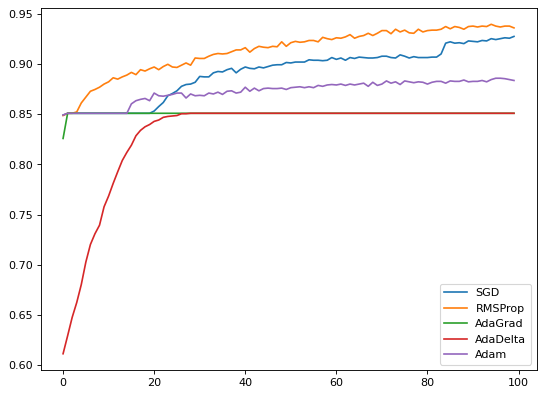

In [24]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history1.epoch, history1.history.get('accuracy'), label='SGD')
plt.plot(history2.epoch, history2.history.get('accuracy'), label='RMSProp')
plt.plot(history3.epoch, history3.history.get('accuracy'), label='AdaGrad')
plt.plot(history4.epoch, history4.history.get('accuracy'), label='AdaDelta')
plt.plot(history5.epoch, history5.history.get('accuracy'), label='Adam')
plt.legend()
plt.show()